In [1]:
"""
Created on Tue Apr  8 11:13:23 2025

@author: david
"""

'\nCreated on Tue Apr  8 11:13:23 2025\n\n@author: david\n'

Pattern di Moire. L’immagine car.tif `e caratterizzata dal pattern di moir´ e, un artefatto piuttosto fasti
dioso che pu`o essere generato da una scansione non appropriata di una fotografia stampata su di un
 giornale. Dopo aver osservato attentamente la trasformata di Fourier dell’immagine, scrivete il codice
 per rimuovere questo disturbo attraverso un opportuno filtro ideale e mostrate l’immagine risultante.

In [2]:
import sys
sys.path.append("../Librerie") 
import numpy as np # importa Numpy
import matplotlib.pyplot as plt # importa Matplotlib
import scipy.ndimage as ndi # importa Scipy per le immagini
import skimage.io as io # importa il modulo Input/Output di SK-Image
import scipy.ndimage as ndi
import mylib as ml

Text(0.5, 1.0, 'Immagine input')

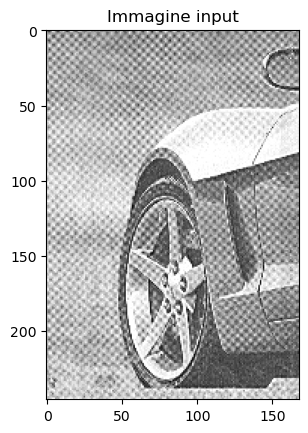

In [3]:
#Visualizzo Immagine input
x = io.imread('../immagini/car.tif')
plt.figure(1)
plt.imshow(x,clim=None,cmap='gray')
plt.title('Immagine input')

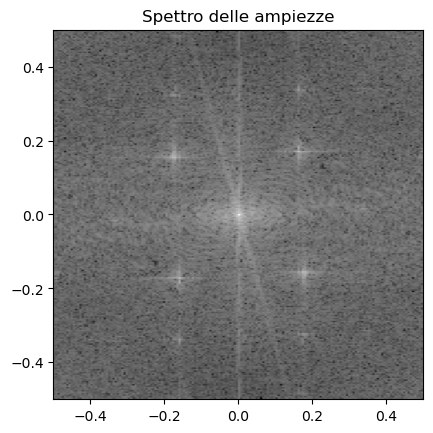

In [4]:
#Visualizzo spettro ampiezze
X = np.fft.fft2(x)
X = np.fft.fftshift(X)
plt.figure(2)
plt.imshow( np.log(1+np.abs(X)),clim=None,cmap='gray',extent=(-0.5,+0.5,-0.5,+0.5))
plt.title('Spettro delle ampiezze')
#Notiamo che il contributo del rumore si traduce in alcune delta alla stessa distanza dal centro
m = np.fft.fftshift( np.fft.fftfreq(X.shape[0]))
n = np.fft.fftshift( np.fft.fftfreq(X.shape[1]))
l,k = np.meshgrid(n,m)#l com.orizzontale , k comp verticale

Text(0.5, 1.0, 'Risp. in frequenza del cerchio')

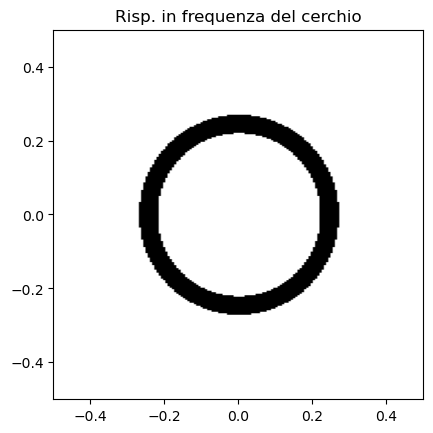

In [5]:
r=0.220
eps=0.05
#Creo cerchio (LPF)
mask =1 - (( np.sqrt( l**2 + k**2 ) > r) & (np.sqrt( l**2 + k**2 ) < (r+eps) ))
plt.figure(4)
plt.imshow( mask,clim=None,cmap='gray',extent=(-0.5,+0.5,-0.5,+0.5))
plt.title('Risp. in frequenza del cerchio')

Text(0.5, 1.0, 'Risultato del filtraggio in frequenza')

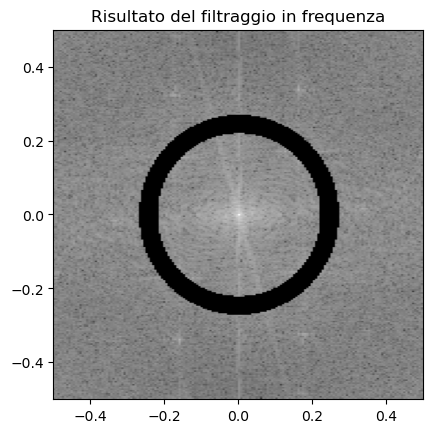

In [6]:
#Applico filtraggio
Y = X  * mask
plt.figure(6)
plt.imshow( np.log( 1+ np.abs(Y)),clim=None,cmap='gray',extent=(-0.5,+0.5,-0.5,+0.5))
plt.title('Risultato del filtraggio in frequenza')

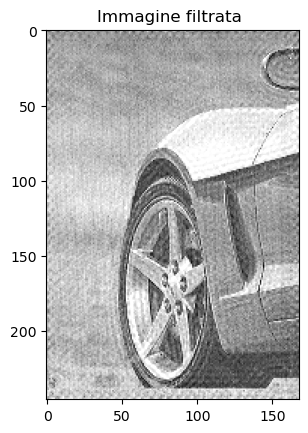

In [7]:
#Verifico filtraggio nel dominio dello spazio
y = np.real(np.fft.ifft2( np.fft.ifftshift( Y ) ));
plt.figure(7); plt.imshow(y, clim=[0,255], cmap='gray');
plt.title('Immagine filtrata ');

Sarebbe opportuno rimuovere più accuratamente le delta magari tramite dei notch.
Lascio da fare come ripetizione